In [31]:
# Initial imports
import pandas as pd
import datetime as dt
from pathlib import Path
import numpy as np

In [32]:
# Set the path for each CSV file
axs_path = Path("../Resources/axs-usd-max.csv")
chain_path = Path("../Resources/chain-usd-max.csv")
mana_path = Path("../Resources/mana-usd-max.csv")
mega_path = Path("../Resources/mega-usd-max.csv")
sand_path = Path("../Resources/sand-usd-max.csv")
# cgg_path = Path("../Resources/cgg-usd-max.csv")

# Read in the data into Pandas DataFrames
axs_df = pd.read_csv(axs_path, index_col="snapped_at", infer_datetime_format=True, parse_dates=True)
chain_df = pd.read_csv(chain_path, index_col="snapped_at", infer_datetime_format=True, parse_dates=True)
mana_df = pd.read_csv(mana_path, index_col="snapped_at", infer_datetime_format=True, parse_dates=True)
mega_df = pd.read_csv(mega_path, index_col="snapped_at", infer_datetime_format=True, parse_dates=True)
sand_df = pd.read_csv(sand_path, index_col="snapped_at", infer_datetime_format=True, parse_dates=True)
# cgg_df = pd.read_csv(cgg_path, index_col="snapped_at", infer_datetime_format=True, parse_dates=True)

sand_df


,price,market_cap,total_volume
snapped_at,,,
2020-08-14 00:00:00+00:00,0.080920,0.000000e+00,3.841302e+07
2020-08-15 00:00:00+00:00,0.066403,0.000000e+00,1.410560e+08
2020-08-16 00:00:00+00:00,0.050784,0.000000e+00,4.315041e+07
2020-08-17 00:00:00+00:00,0.061080,3.276463e+07,3.370087e+07
2020-08-18 00:00:00+00:00,0.054974,7.171054e+07,1.621430e+07
...,...,...,...
2021-04-02 00:00:00+00:00,0.777846,5.338858e+08,1.609682e+08
2021-04-03 00:00:00+00:00,0.763961,5.267513e+08,9.965970e+07
2021-04-04 00:00:00+00:00,0.678246,4.700159e+08,8.691882e+07


In [33]:
#make the date / index simply yyyy-m,m-22 format

axs_df.index = axs_df.index.date
chain_df.index = chain_df.index.date
mana_df.index = mana_df.index.date
mega_df.index = mega_df.index.date
sand_df.index = sand_df.index.date
# cgg_df.index = cgg_df.index.date

axs_df

,price,market_cap,total_volume
2020-11-04,0.145700,7.754756e+06,1.885524e+07
2020-11-05,0.145700,7.754756e+06,1.885524e+07
2020-11-06,0.134893,7.257185e+06,5.718030e+06
2020-11-07,0.142960,7.678065e+06,3.529226e+06
2020-11-08,0.141995,7.658840e+06,2.744359e+06
...,...,...,...
2021-04-02,5.550468,3.070382e+08,6.242929e+07
2021-04-03,5.666851,3.133285e+08,5.389935e+07
2021-04-04,5.085394,2.817200e+08,3.184087e+07
2021-04-05,5.887248,3.249742e+08,8.907999e+07


________________________________________________________________________________________________________
** comparing prices **
________________________________________________________________________________________________________

In [34]:
# 1. Convert dfs into price only

axs_price_df = axs_df[['price']]
chain_price_df = chain_df[['price']]
mana_price_df = mana_df[['price']]
mega_price_df = mega_df[['price']]
sand_price_df = sand_df[['price']]
# cgg_price_df = cgg_df[['price']]


axs_price_df = axs_price_df.rename(columns={ "price": "axs_price" })
chain_price_df = chain_price_df.rename(columns={ "price": "chain_price" })
mana_price_df = mana_price_df.rename(columns={ "price": "mana_price" })
mega_price_df = mega_price_df.rename(columns={ "price": "mega_price" })
sand_price_df = sand_price_df.rename(columns={ "price": "sand_price" })
# cgg_price_df = cgg_price_df.rename(columns={ "price": "cgg_price" })

sand_price_df


,sand_price
2020-08-14,0.080920
2020-08-15,0.066403
2020-08-16,0.050784
2020-08-17,0.061080
2020-08-18,0.054974
...,...
2021-04-02,0.777846
2021-04-03,0.763961
2021-04-04,0.678246
2021-04-05,0.721854


In [35]:
gaming_portfolio_prices_df = pd.concat(
    [axs_price_df, chain_price_df, mana_price_df, mega_price_df, sand_price_df], axis="columns", join="inner"
)
gaming_portfolio_prices_df


,axs_price,chain_price,mana_price,mega_price,sand_price
2020-11-04,0.145700,0.010846,0.064276,5.665645,0.030851
2020-11-05,0.145700,0.010517,0.064668,5.558004,0.031672
2020-11-06,0.134893,0.010915,0.074019,5.447841,0.034034
2020-11-07,0.142960,0.012418,0.082813,4.212873,0.037512
2020-11-08,0.141995,0.011722,0.074607,4.527400,0.036349
...,...,...,...,...,...
2021-04-02,5.550468,0.767179,1.012906,32.449931,0.777846
2021-04-03,5.666851,0.739599,1.035631,43.229351,0.763961
2021-04-04,5.085394,0.655224,0.942694,40.667193,0.678246
2021-04-05,5.887248,0.641372,1.002164,39.101640,0.721854


_______________________________________
** clean data **
______________________________________

In [37]:
gaming_portfolio_prices_df.count()

axs_price      154
chain_price    154
mana_price     154
mega_price     154
sand_price     154
dtype: int64

In [38]:
gaming_portfolio_prices_df.isnull().sum()

axs_price      0
chain_price    0
mana_price     0
mega_price     0
sand_price     0
dtype: int64

____________________________________________________________________________________________
** realised the index dataset starts in 2021-01-27, so start this dataframe from there for analysis purposes **
____________________________________________________________________________________________

In [39]:
gaming_portfolio_prices_df = gaming_portfolio_prices_df.iloc[84:]
gaming_portfolio_prices_df

# EXPERIMENTED USING LOC FOR GREATER ACCURACY. FELL SHORT
# gaming_portfolio_prices_df.index = pd.to_datetime(gaming_portfolio_prices_df.index)  
# mask = (gaming_portfolio_prices_df.index > 2021-1-27)
# gaming_portfolio_prices_df.loc[mask]

# gaming_portfolio_prices_df = gaming_portfolio_prices_df.loc['2021-01-27':]
# gaming_portfolio_prices_df

,axs_price,chain_price,mana_price,mega_price,sand_price
2021-01-27,0.948244,0.015689,0.166735,4.031609,0.093103
2021-01-28,0.877659,0.013436,0.146896,3.734923,0.081618
2021-01-29,0.814617,0.014589,0.157639,3.778311,0.087890
2021-01-30,0.812835,0.015401,0.154034,4.121091,0.087641
2021-01-31,0.840237,0.016199,0.155607,4.465678,0.087209
...,...,...,...,...,...
2021-04-02,5.550468,0.767179,1.012906,32.449931,0.777846
2021-04-03,5.666851,0.739599,1.035631,43.229351,0.763961
2021-04-04,5.085394,0.655224,0.942694,40.667193,0.678246
2021-04-05,5.887248,0.641372,1.002164,39.101640,0.721854


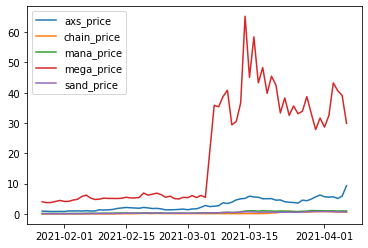

In [40]:
gaming_portfolio_prices_df.plot();

____________________________________________________________________________________________
** Calculate Daily Returns of all assets **
____________________________________________________________________________________________

In [43]:
gaming_asset_portfolio_daily_returns = gaming_portfolio_prices_df.pct_change().dropna()
columns = ['axs', 'chain', 'mana', 'mega', 'sand']
gaming_asset_portfolio_daily_returns.columns = columns
gaming_asset_portfolio_daily_returns

,axs,chain,mana,mega,sand
2021-01-28,-0.074438,-0.143571,-0.118989,-0.073590,-0.123355
2021-01-29,-0.071830,0.085796,0.073137,0.011617,0.076841
2021-01-30,-0.002188,0.055660,-0.022869,0.090723,-0.002830
2021-01-31,0.033712,0.051836,0.010209,0.083616,-0.004934
2021-02-01,-0.044384,-0.059344,-0.009828,-0.070622,-0.049004
...,...,...,...,...,...
2021-04-02,-0.025313,-0.051129,-0.002880,0.132882,-0.028033
2021-04-03,0.020968,-0.035949,0.022435,0.332186,-0.017851
2021-04-04,-0.102607,-0.114083,-0.089739,-0.059269,-0.112197
2021-04-05,0.157678,-0.021141,0.063084,-0.038497,0.064294


____________________________________________________________________________________________
** Calculate Summary Statistics of everything **
____________________________________________________________________________________________

In [44]:
gaming_asset_portfolio_daily_returns.describe()

,axs,chain,mana,mega,sand
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.041969,0.081812,0.031884,0.064252,0.034917
std,0.138585,0.322173,0.110150,0.377490,0.113720
min,-0.192220,-0.277819,-0.153119,-0.309114,-0.197547
25%,-0.053580,-0.059344,-0.043202,-0.073873,-0.033113
50%,0.020968,0.012111,0.024276,0.016602,0.021354
75%,0.106245,0.101981,0.082275,0.102342,0.087335
max,0.578212,2.185799,0.444427,2.766163,0.409000


____________________________________________________________________________________________
** Daily Standard Deviations **
____________________________________________________________________________________________

In [45]:
# Daily STD deviation
gaming_assets_by_daily_volatility = gaming_asset_portfolio_daily_returns.std().sort_values(ascending=False)
gaming_assets_by_daily_volatility

mega     0.377490
chain    0.322173
axs      0.138585
sand     0.113720
mana     0.110150
dtype: float64

____________________________________________________________________________________________
** Annualised Standard Deviations **
____________________________________________________________________________________________

In [47]:
# Annualized Standard Deviation
gaming_assets_by_annual_volatility = gaming_assets_by_daily_volatility * np.sqrt(252)
gaming_assets_by_annual_volatility


mega     5.992473
chain    5.114341
axs      2.199973
sand     1.805248
mana     1.748575
dtype: float64

____________________________________________________________________________________________
** Determine Sharpe Ratios **
i.e. the measure of how much excess return the investor can expect for each unit of volatility
____________________________________________________________________________________________

In [57]:
gaming_pfolio_sharpe_ratios = (gaming_asset_portfolio_daily_returns.mean() * 252) / (gaming_asset_portfolio_daily_returns.std() * np.sqrt(252))
gaming_pfolio_sharpe_ratios = gaming_pfolio_sharpe_ratios.sort_values()
gaming_pfolio_sharpe_ratios


## NOTE! THIS IS THE EQUATION GIVEN IN CLASS! The actual formula says that the denominator is Rp - Rf [portfolio return LESS risk-free rate].

mega     2.701964
chain    4.031147
mana     4.594981
axs      4.807370
sand     4.874175
dtype: float64

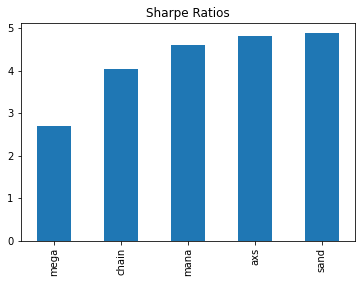

In [55]:
gaming_pfolio_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios");

In [56]:
# Generally speaking, Sharpe ratios above 1 are good.
# Anything above 2 is really good, and anything above 3 is excellent
# Therefore, everything rocks!